# Pneumonia detection using X-Ray images and Deep Learning

## Introduction

Pneumonia is an infection that inflames the alveoli in one or both lungs. The alveoli may fill with pus, causing cough with phlegm or pus, fever, chills, and difficulty breathing. In general, pneumonia is caused by a virus, a bacteria or fungi.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

Chest X-Ray images can be useful in the diagnosis of Pneumonia. A doctor can diagnose it, know the extent and the location of the infection by looking at an X-Ray image withing a few seconds or minutes. 

The aim of this work is to automatize the detection of Pneumonia by using Deep Learning algorithms and only X-Ray images. Different techniques will be used in order to achieve the best possible results. If this task can be sucessfully achieved by a machine, then it will help doctors to save a lot of time that could be used in other actions.

## Exploratory Analysis

First let's take a look to the available data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt # plots

from PIL import Image # image
from keras.preprocessing.image import ImageDataGenerator # pre-processing
from keras import layers, models, optimizers # modeling

In [2]:
# Path to data
base_dir = '../input/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

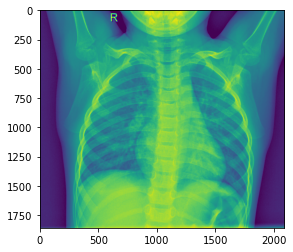

In [3]:
imagen = plt.imread(os.path.join(train_dir, 'NORMAL/IM-0115-0001.jpeg'))
plt.imshow(imagen)

In [4]:
# Loading images from directory using generator
train_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary' # We only have 2 classes, so class_mode will be 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
# Sanity check
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


## Baseline Model - Convolutional Neural Network

In [37]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [38]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [39]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=14,
                              validation_data=val_generator,
                              validation_steps=4)

Epoch 1/14
100/100 [==============================] - 55s 549ms/step - loss: 0.5123 - acc: 0.7570 - val_loss: 0.7964 - val_acc: 0.5625
Epoch 2/14
100/100 [==============================] - 51s 509ms/step - loss: 0.3782 - acc: 0.8131 - val_loss: 0.7265 - val_acc: 0.5625
Epoch 3/14
100/100 [==============================] - 51s 515ms/step - loss: 0.3474 - acc: 0.8390 - val_loss: 0.9652 - val_acc: 0.5625
Epoch 4/14
100/100 [==============================] - 51s 510ms/step - loss: 0.3271 - acc: 0.8477 - val_loss: 0.6148 - val_acc: 0.6250
Epoch 5/14
100/100 [==============================] - 52s 517ms/step - loss: 0.3246 - acc: 0.8635 - val_loss: 0.7265 - val_acc: 0.5625
Epoch 6/14
100/100 [==============================] - 53s 526ms/step - loss: 0.3056 - acc: 0.8577 - val_loss: 1.0805 - val_acc: 0.5625
Epoch 7/14
100/100 [==============================] - 52s 519ms/step - loss: 0.3038 - acc: 0.8635 - val_loss: 0.5712 - val_acc: 0.6250
Epoch 8/14
100/100 [==============================] - 4

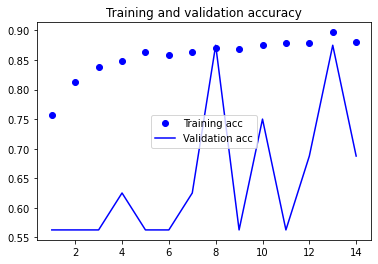

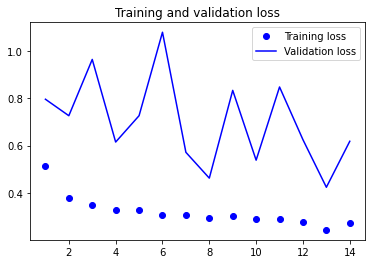

In [40]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

test acc: 0.879807710647583


In [43]:
model.save('/kaggle/working/baseline_cnn.h5')

We achieved an accuracy of **88.0%** in the test set.

## Image Augmentation

We will apply data augmentation in order to increase the size of the training set. For that, we will create a new Train ImageDataGenerator object.

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary' # We only have 2 classes, so class_mode will be 'binary'
)

Found 5216 images belonging to 2 classes.


In [16]:
model2 = models.Sequential() 
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model2.add(layers.MaxPooling2D((2, 2))) 
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu')) 
model2.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history2 = model2.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=8,
                                validation_data=val_generator,
                                validation_steps=4)

Epoch 1/8
100/100 [==============================] - 54s 544ms/step - loss: 0.2421 - acc: 0.8955 - val_loss: 0.6468 - val_acc: 0.8125
Epoch 2/8
100/100 [==============================] - 53s 530ms/step - loss: 0.2419 - acc: 0.9073 - val_loss: 0.8770 - val_acc: 0.6250
Epoch 3/8
100/100 [==============================] - 51s 513ms/step - loss: 0.2363 - acc: 0.8995 - val_loss: 0.7495 - val_acc: 0.6875
Epoch 4/8
100/100 [==============================] - 50s 497ms/step - loss: 0.2301 - acc: 0.8995 - val_loss: 0.7974 - val_acc: 0.5625
Epoch 5/8
100/100 [==============================] - 47s 475ms/step - loss: 0.2107 - acc: 0.9180 - val_loss: 3.5889 - val_acc: 0.5000
Epoch 6/8
100/100 [==============================] - 52s 521ms/step - loss: 0.2476 - acc: 0.9015 - val_loss: 0.6808 - val_acc: 0.8125
Epoch 7/8
100/100 [==============================] - 49s 486ms/step - loss: 0.2247 - acc: 0.9103 - val_loss: 0.7481 - val_acc: 0.7500
Epoch 8/8
100/100 [==============================] - 46s 464ms

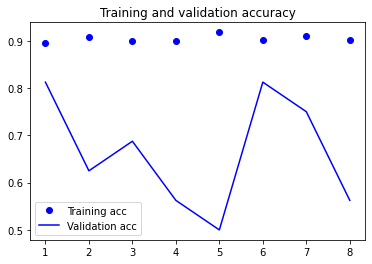

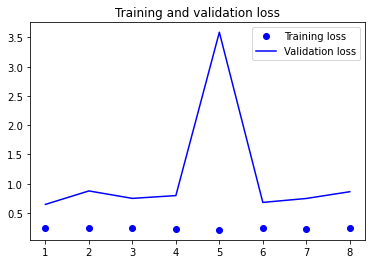

In [34]:
acc = history2.history['acc']
val_acc = history2.history['val_acc'] 
loss = history2.history['loss'] 
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

test acc: 0.8429487347602844


In [44]:
model.save('/kaggle/working/cnn_augmented.h5')

Now, we got an accuracy of **84.3%** in the test set

## Adding Dropout

Now, let's add some dropout layers to the previous network in order to reduce overfitting.

In [26]:
model3 = models.Sequential() 
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model3.add(layers.MaxPooling2D((2, 2))) 
model3.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model3.add(layers.MaxPooling2D((2, 2))) 
model3.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model3.add(layers.MaxPooling2D((2, 2))) 
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(512, activation='relu')) 
model3.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model3.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history3 = model3.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=9,
                                validation_data=val_generator,
                                validation_steps=4)

Epoch 1/9
100/100 [==============================] - 60s 605ms/step - loss: 0.2686 - acc: 0.8853 - val_loss: 0.3688 - val_acc: 0.8125
Epoch 2/9
100/100 [==============================] - 65s 647ms/step - loss: 0.2454 - acc: 0.8865 - val_loss: 1.3524 - val_acc: 0.5625
Epoch 3/9
100/100 [==============================] - 58s 583ms/step - loss: 0.2519 - acc: 0.8968 - val_loss: 0.4852 - val_acc: 0.6875
Epoch 4/9
100/100 [==============================] - 56s 561ms/step - loss: 0.2182 - acc: 0.9065 - val_loss: 0.6350 - val_acc: 0.6875
Epoch 5/9
100/100 [==============================] - 56s 556ms/step - loss: 0.2703 - acc: 0.8895 - val_loss: 0.5332 - val_acc: 0.7500
Epoch 6/9
100/100 [==============================] - 53s 535ms/step - loss: 0.2406 - acc: 0.8893 - val_loss: 1.2132 - val_acc: 0.5625
Epoch 7/9
100/100 [==============================] - 47s 467ms/step - loss: 0.2398 - acc: 0.9025 - val_loss: 0.9583 - val_acc: 0.6250
Epoch 8/9
100/100 [==============================] - 52s 516ms

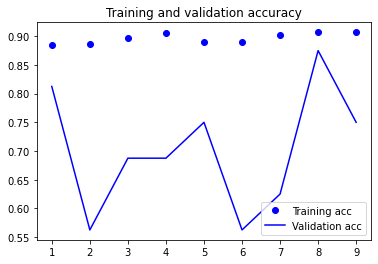

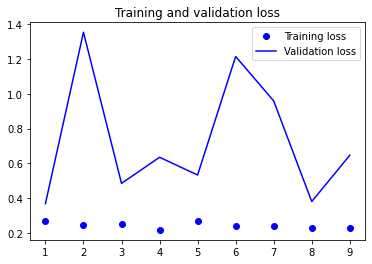

In [29]:
acc = history3.history['acc']
val_acc = history3.history['val_acc'] 
loss = history3.history['loss'] 
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
test_loss, test_acc = model3.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

test acc: 0.8942307829856873


In [32]:
model.save('/kaggle/working/cnn_augmented_dropout.h5')

We got an accuracy of **89.4%**.

# Transfer Learning

With the previous solutions, the maximum accuracy we reached was **89.4%**. Now, let's try something different. We will use a pre-trained neural network to see if we get better results.